In [14]:
# Chapter17
import pylab
import random

In [15]:
def variance(X):
    """Xを数のリストとする。
       Xの分散を返す"""
    mean = sum(X)/len(X)
    tot = 0.0
    for x in X:
        tot += (x-mean)**2
    return tot/len(X)

def stdDev(X):
    """を数のリストとする。
       Xの標準偏差を返す。"""
    return variance(X)**0.5

In [16]:
# 17.2
def getBMData(filename):
    """与えられたファイルの内容を読み込む、
       ファイルは次の6要素がカンマで区切られた形式
       0. 氏名(string), 1. 性別(string), 2. 年齢(int), 3. 区分(走/車いす),4. 出身国(string),5. 総合タイム(float)
       返り値: それぞれが6変数のリストのdict(辞書)"""
    data = {}
    f = open(filename)
    line = f.readline()
    data['name'],data['gender'],data['age'] = [],[],[] # 辞書要素をリストで初期化
    data['division'],data['country'],data['time'] = [],[],[]
    while line != '': # 最終行まで読み込む
        split = line.split(',') # カンマで区切りリストで返す
        data['name'].append(split[0])
        data['gender'].append(split[1])
        data['age'].append(split[2])
        data['division'].append(split[3])
        data['country'].append(split[4])
        data['time'].append(float(split[5][:-1])) # 改行\nを取り除く
        line = f.readline()
    f.close()
    return data

In [17]:
def makeHist(data,bins,title,xLabel,yLabel):
    pylab.hist(data,bins)
    pylab.title(title)
    pylab.xlabel(xLabel)
    pylab.ylabel(yLabel)
    mean = sum(data)/len(data)
    # print(mean)
    std = stdDev(data)
    pylab.annotate('Mean =' + str(round(mean,2)) + '\nSD =' + str(round(std,2)),\
                    fontsize = 12,xy = (0.65,0.75),xycoords = 'axes fraction')

In [18]:
times = getBMData('bm_results2012.txt')['time']

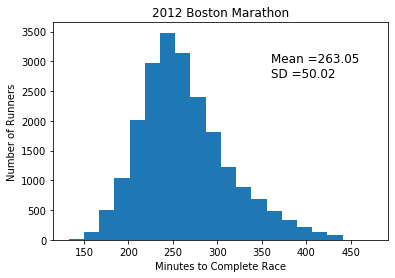

In [19]:
makeHist(times,20,'2012 Boston Marathon', 'Minutes to Complete Race', 'Number of Runners')

#### データの可視化
- フィニッシュタイムの分布
- 右に裾が広がっている。⇒正規分布ではない

In [22]:
# 17.3　フィニッシュタイムの抽出とヒストグラム
def sampleTimes(times, numExamples):
    """times: float型のリスト
       numExamples: int型の取り出す数
       平均・標準偏差とともに分布を描画する"""
    sample = random.sample(times, numExamples)
    makeHist(sample, 10, 'Sample of Size' + str(numExamples),
                'Minutes to Conplete Race','Number of race')

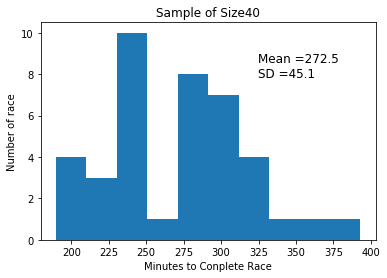

In [23]:
sampleSize = 40
sampleTimes(times,sampleSize)

#### memo
- 分布は正規分布からかなりかけ離れている。⇒ 標本サイズが小さいから。
- 驚く点は、標本サイズが小さいのに(21000データ中の40)推定された平均値・標準偏差の差が小さい(約2%未満)
- 推定がどのくらい信頼できるのものか定量的に表せないか。。。

In [28]:
# 17.4 平均推定における分散の影響
import scipy.integrate

def gaussian(x,mu,sigma):
    factor1 = (1/(sigma*((2*pylab.pi)**0.5)))
    factor2 = pylab.e**-(((x-mu)**2)/(2*sigma**2))
    return factor1 * factor2

area = round(scipy.integrate.quad(gaussian,-3,3,(0,1))[0],4)
print('Probability of being within 3',
        'of true mean of tight dist. =',area)
area = round(scipy.integrate.quad(gaussian,-3,3,(0,100))[0],4)
print('Probability of being within 3',
        'of true mean of wide dist. =',area)

Probability of being within 3 of true mean of tight dist. = 0.9973
Probability of being within 3 of true mean of wide dist. = 0.0239


In [32]:
def testSamples(numTrials, sampleSize):
    tightMeans, wideMeans = [],[]
    for t in range(numTrials):
        sampleTight, sampleWide = [],[]
        for i in range(sampleSize):
            sampleTight.append(random.gauss(0,1))   # random.gauss(mu,sigma)
            sampleWide.append(random.gauss(0,100))
        tightMeans.append(sum(sampleTight)/len(sampleTight))
        wideMeans.append(sum(sampleWide)/len(sampleWide))
    return tightMeans, wideMeans

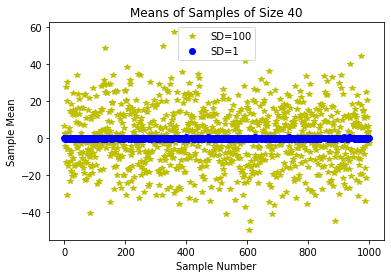

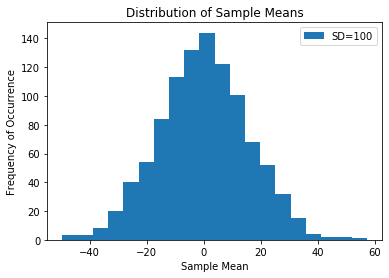

In [33]:
tightMeans, wideMeans = testSamples(1000,40) # 標本サイズ40を1000回取出す試行
pylab.plot(wideMeans, 'y*',label = 'SD=100')
pylab.plot(tightMeans,'bo',label = 'SD=1')
pylab.xlabel('Sample Number')
pylab.ylabel('Sample Mean')
pylab.title('Means of Samples of Size ' + str(40))
pylab.legend()

pylab.figure()
pylab.hist(wideMeans, bins=20, label='SD=100')
pylab.title('Distribution of Sample Means')
pylab.xlabel('Sample Mean')
pylab.ylabel('Frequency of Occurrence')
pylab.legend()

- 上図:2つの母集団から取った標本サイズ40の標本各1000個の平均をプロット
- 下図:標準偏差が100の場合のヒストグラム
    - 平均が0付近を中心とする正規分布に似ている⇒_中心極限定理_